**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("/content/STOCKS.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130934 entries, 0 to 130933
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    130934 non-null  object 
 1   open    130933 non-null  float64
 2   high    130933 non-null  float64
 3   low     130933 non-null  float64
 4   close   130933 non-null  float64
 5   volume  130933 non-null  float64
 6   Name    130933 non-null  object 
dtypes: float64(5), object(2)
memory usage: 7.0+ MB


**Analysing various features of the dataset**

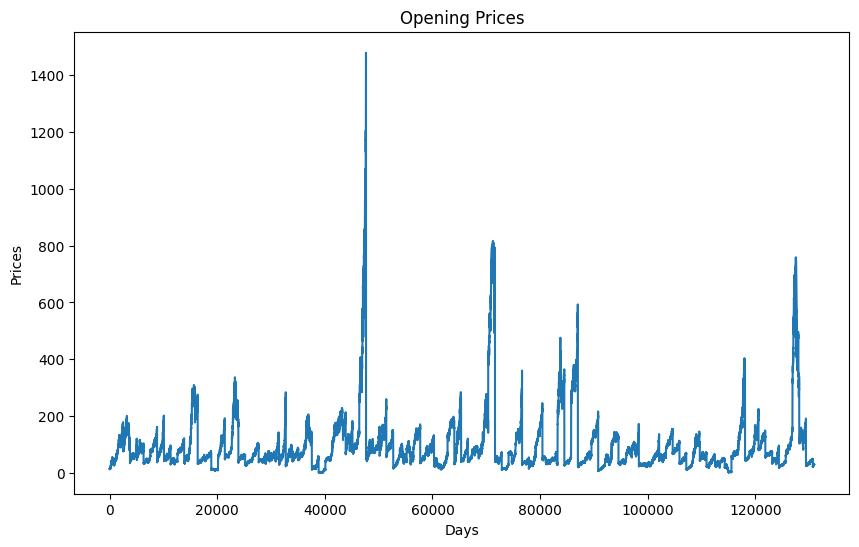

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Opening Prices")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(df['open'])
plt.show()

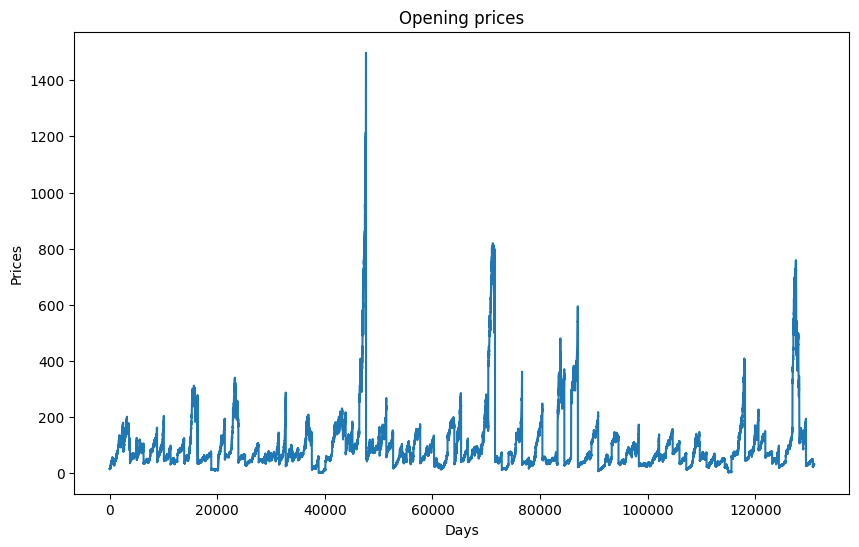

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Highest prices")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(df['high'])
plt.show()

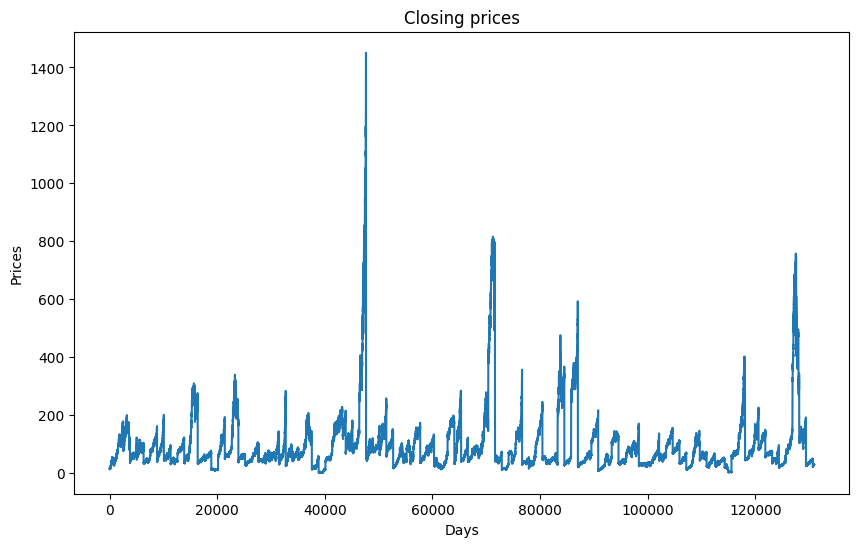

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Closing prices")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(df['close'])
plt.show()

In [ ]:
df1 = df['close']
df1.tail()

619035    77.82
619036    76.78
619037    73.83
619038    73.27
619039    73.86
Name: close, dtype: float64

In [ ]:
df1 = pd.DataFrame(df1)
df1.tail()

,close
619035,77.82
619036,76.78
619037,73.83
619038,73.27
619039,73.86


**Prediction of closing prices after 100 days**

In [ ]:
# Prediction for 100 days into the future.
future_days = 100
df1['Prediction'] = df1['close'].shift(-future_days)
df1.tail()

,close,Prediction
619035,77.82,NaN
619036,76.78,NaN
619037,73.83,NaN
619038,73.27,NaN
619039,73.86,NaN


In [ ]:
X = np.array(df1.drop(['Prediction'], 1))[:-future_days]
print(X)
y = np.array(df1['Prediction'])[:-future_days]
print("\n" ,y)

[[14.75]
 [14.46]
 [14.27]
 ...
 [65.4 ]
 [65.28]
 [65.25]]

 [16.75 16.84 16.94 ... 73.83 73.27 73.86]


<ipython-input-6-2f09f6ee8632>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df1.drop(['Prediction'], 1))[:-future_days]


**Linear and Decision Tree Regresion**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
nan_index = pd.isna(y_train)
nan_rows = x_train[nan_index]

In [ ]:
x_train = x_train[~nan_index]
y_train = y_train[~nan_index]

In [ ]:
from sklearn.impute import SimpleImputer

y_train=y_train.reshape(-1,1)
imputer=SimpleImputer(strategy="mean")
y_train=imputer.fit_transform(y_train)
y_train=y_train.ravel()

In [ ]:
dtree=DecisionTreeRegressor()
lr=LinearRegression()

dtree.fit(x_train,y_train)
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_future=df1.drop(['Prediction'], 1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
print(x_future)

[[55.12]
 [55.57]
 [56.46]
 [56.11]
 [56.28]
 [56.47]
 [55.59]
 [58.87]
 [59.47]
 [58.81]
 [59.43]
 [59.9 ]
 [59.72]
 [59.88]
 [60.  ]
 [60.33]
 [59.73]
 [59.91]
 [60.31]
 [60.31]
 [61.43]
 [62.3 ]
 [62.58]
 [62.61]
 [62.26]
 [62.28]
 [62.64]
 [62.5 ]
 [62.67]
 [62.98]
 [63.26]
 [62.58]
 [62.59]
 [61.85]
 [61.96]
 [62.23]
 [62.39]
 [62.55]
 [63.03]
 [63.  ]
 [63.  ]
 [63.51]
 [62.78]
 [62.72]
 [62.76]
 [62.95]
 [62.5 ]
 [62.38]
 [62.67]
 [62.55]
 [61.79]
 [62.59]
 [62.47]
 [62.21]
 [62.56]
 [63.05]
 [63.35]
 [63.07]
 [62.46]
 [62.42]
 [62.75]
 [63.16]
 [63.29]
 [61.28]
 [62.06]
 [62.01]
 [62.21]
 [62.52]
 [62.12]
 [61.54]
 [62.28]
 [62.12]
 [61.83]
 [60.  ]
 [60.81]
 [59.74]
 [59.73]
 [60.74]
 [61.03]
 [61.5 ]
 [60.9 ]
 [60.75]
 [61.35]
 [61.6 ]
 [61.36]
 [61.39]
 [61.33]
 [61.54]
 [61.5 ]
 [61.94]
 [62.7 ]
 [62.87]
 [63.17]
 [63.39]
 [64.85]
 [64.7 ]
 [65.28]
 [65.4 ]
 [65.28]
 [65.25]]


<ipython-input-16-d8cbe4fb65b3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future=df1.drop(['Prediction'], 1)[:-future_days]


**Predicted Values**

In [ ]:
dtree_prediction=dtree.predict(x_future)
print(dtree_prediction)

[59.8947475  60.25185185 58.14403846 57.73021277 58.25733333 59.545
 57.84947917 59.29455556 64.08076087 63.6625     59.73836957 62.3437234
 63.40018868 62.42169643 60.94578947 66.19       62.2122549  62.21333333
 61.84653846 61.84653846 67.2529     68.26982143 66.16921053 65.93736842
 67.4775     68.54953488 63.56967213 64.67378378 63.93357143 66.52204545
 66.21255814 66.16921053 65.49340426 65.28843137 68.96843137 64.35630952
 65.8027381  64.38136364 63.99121951 67.3627027  67.3627027  67.3696875
 66.5554     68.4041     64.09541667 63.32422222 64.67378378 67.64544643
 63.93357143 64.38136364 64.5442     65.49340426 68.5625     67.05642857
 65.07641304 68.84924528 66.3331746  69.704375   67.35882353 65.26925926
 65.82181818 65.29969388 67.21438596 65.0683     63.84540541 63.5538
 67.05642857 68.54857143 67.45614035 67.60913462 68.54953488 67.45614035
 69.32342105 60.94578947 62.59489362 63.29947368 62.2122549  62.32363636
 66.5762069  66.05938596 62.43617647 68.11313953 63.48377778 6

In [ ]:
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[58.11621522 58.51799739 59.31263325 59.000136   59.15192038 59.32156174
 58.53585438 61.4644     62.00010956 61.41082904 61.96439559 62.38403475
 62.22332188 62.36617776 62.47331968 62.76795994 62.23225037 62.39296324
 62.75010295 62.75010295 63.75009414 64.52687301 64.7768708  64.80365628
 64.49115904 64.50901602 64.83044176 64.70544286 64.85722724 65.13401051
 65.38400831 64.7768708  64.7857993  64.12509083 64.22330425 64.46437356
 64.60722944 64.75008533 65.17865298 65.1518675  65.1518675  65.60722063
 64.95544066 64.9018697  64.93758367 65.10722504 64.70544286 64.59830095
 64.85722724 64.75008533 64.07151988 64.7857993  64.67865738 64.44651657
 64.75901382 65.19650996 65.46436474 65.21436695 64.66972889 64.63401492
 64.92865518 65.29472338 65.41079379 63.61616675 64.31258918 64.26794672
 64.44651657 64.72329985 64.36616014 63.84830756 64.50901602 64.36616014
 64.10723385 62.47331968 63.19652759 62.24117886 62.23225037 63.13402814
 63.39295443 63.81259359 63.27688402 63.14295663 63

In [ ]:
predictions = dtree_prediction
valid = df1[X.shape[0]:]
valid['Predictions'] = predictions

**Final Graph for Analysis**

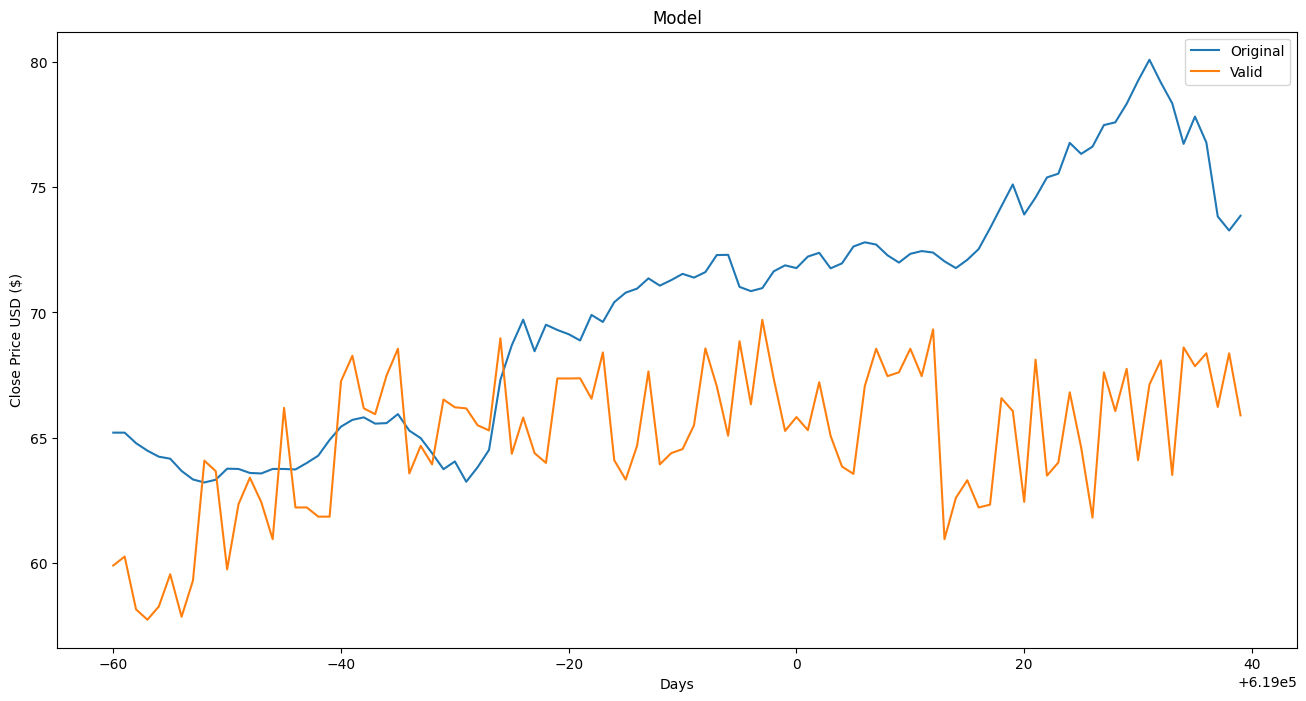

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

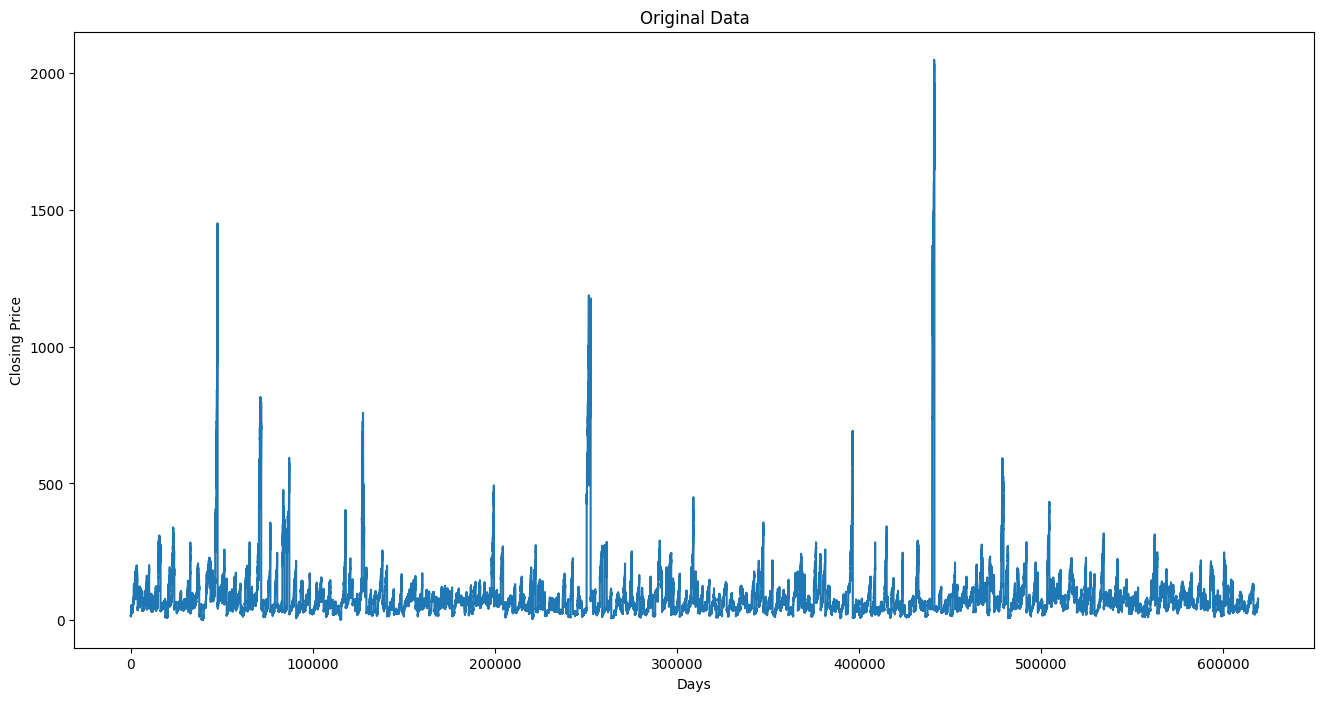

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Original Data")
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df1['close'])